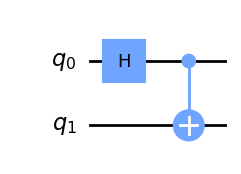

In [1]:
from qiskit import QuantumCircuit
 
# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)
 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
 
# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

In [2]:
from qiskit.quantum_info import Pauli
 
ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
 
service = QiskitRuntimeService()
 
# Run on the least-busy backend you have access to
backend = service.least_busy(simulator=False, operational=True)
 
options = Options()
options.resilience_level = 1
options.optimization_level = 3
 
# Create an Estimator object
estimator = Estimator(backend, options=options)
 
# Submit the circuit to Estimator
job = estimator.run(circuits=[qc]*6, observables=[IZ, IX, ZI, XI, ZZ, XX], shots = 5000)
 
# Once the job is complete, get the result
job.result()

RuntimeInvalidStateError: 'Unable to retrieve result for job cn6zm60anbvg008dayvg. Job was cancelled.'